In [12]:
import pandas as pd
import rpy2.robjects as ro
from rpy2.robjects import pandas2ri
pandas2ri.activate()

In [13]:
TRAIN_PATH = "./data/spam_data_train.rda"
TEST_PATH = "./data/spam_data_test.rda"

In [14]:
ro.r["load"](TRAIN_PATH)
ro.r["load"](TEST_PATH)

array(['data_test'], dtype='<U9')

In [15]:
train_data = ro.r["data_train"]
test_data = ro.r["data_test"]

train_df = pandas2ri.rpy2py(train_data)
test_df = pandas2ri.rpy2py(test_data)
print(train_data.head())
print(test_data.head())


     word_freq_make word_freq_address word_freq_all word_freq_3d word_freq_our
455             0.0               0.0          0.89            0          1.79
2246            0.0               0.0          0.00            0          0.00
1935            0.0               0.0          0.00            0          0.00
1384            0.0               0.0          0.00            0          1.82
679             0.1               0.1          0.70            0          0.60
4129            0.0               0.0          0.00            0          0.00
     word_freq_over word_freq_remove word_freq_internet word_freq_order
455            0.44             0.00               0.00            0.00
2246           0.00             0.00               0.00            0.00
1935           0.00             0.00               0.00            0.00
1384           0.36             0.36               0.72            0.36
679            0.20             0.40               0.10            1.41
4129           

## 2. ACP

Pourcentage de variance gardée par les 2 premières composantes principales : 1.00


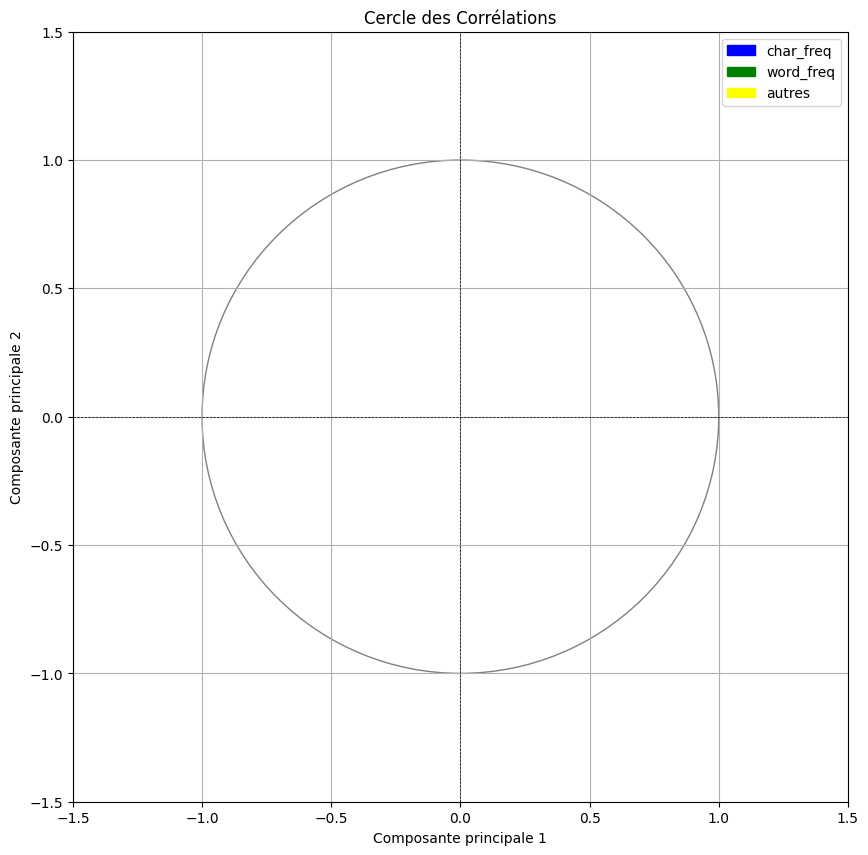

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches  # Ajout de l'importation des patches

# Normalisation des données (centrage des variables)
Z = train_df - train_df.mean(axis=0)

# Calcul de la matrice de covariance
S = np.cov(Z, rowvar=False)

# Calcul des valeurs propres et des vecteurs propres
ls, vs = np.linalg.eig(S)

# Tri des valeurs propres et des vecteurs propres
idx = np.argsort(ls)[::-1]
ls_tries = ls[idx]
vs_tries = vs[:, idx]

# Affichage du pourcentage de variance expliquée
print(f'Pourcentage de variance gardée par les 2 premières composantes principales : {np.sum(ls_tries[:2]) / np.sum(ls_tries):.2f}')

# Transformation des données
Z_new = np.dot(Z, vs_tries[:, :2])  # Multiplie Z par les deux premiers vecteurs propres

# Échelle des composantes principales (éventuellement ajustée)
eigenvalues_sqrt = np.sqrt(ls_tries[:2])  # Racine carrée des valeurs propres
components = vs_tries[:, :2] * eigenvalues_sqrt * 1.5  # Projection des composantes principales avec échelle ajustée

# Création du graphique
fig, ax = plt.subplots(figsize=(10, 10))

# Ajout d'un cercle des corrélations
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)

# Ajout des points et des flèches
for i, component in enumerate(components.T):  # Composantes principales en colonnes
    # S'assurer qu'il y a bien 2 valeurs à décompresser
    if component.shape[0] == 2:
        x, y = component  # Décompresser la colonne en x et y
    else:
        continue  # Passer à la prochaine itération si la composante n'a pas 2 valeurs
    
    name = train_df.columns[i]
    color = 'yellow'
    
    # Choix des couleurs en fonction du préfixe du nom de la variable
    if name.startswith('char_freq_'):
        name = name.replace('char_freq_', '')
        color = 'blue'
    elif name.startswith('word_freq_'):
        name = name.replace('word_freq_', '')
        color = 'green'
    
    # Affichage des variables (points)
    ax.scatter(x, y, color=color, marker='x', s=100)  # Points
    # Affichage des flèches (quiver)
    ax.quiver(0, 0, x, y, angles='xy', scale_units='xy', scale=50, color=color, width=0.005)  # Flèche avec quiver
    ax.text(x * 1.1, y * 1.1, name, color='black', ha='center', va='center')

# Création des légendes
char_freq_patch = mpatches.Patch(color='blue', label='char_freq')
word_freq_patch = mpatches.Patch(color='green', label='word_freq')
autres_patch = mpatches.Patch(color='yellow', label='autres')

# Ajout des légendes au graphique
ax.legend(handles=[char_freq_patch, word_freq_patch, autres_patch], loc='upper right')

# Configuration des axes et du graphique
plt.xlim(-1.5, 1.5)  # Augmentation de l'échelle des axes
plt.ylim(-1.5, 1.5)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid(True)
plt.title('Cercle des Corrélations')

# Sauvegarde et affichage du graphique
plt.savefig('cercle_correlation.png')
plt.show()


In [39]:
Z = train_df - np.mean(train_df)
S = np.cov(Z, rowvar=False)
ls, vs = np.linalg.eig(S)
idx = np.argsort(ls)[::-1]
ls_tries = ls[idx]
vs_tries = vs[:, idx]
print(f'pourcentage de variance gardée : {ls_tries[0]/np.sum(ls_tries)}')
Z_new = np.dot(vs_tries[:, :2].T, Z.T) 

eigenvalues_sqrt = np.sqrt(ls_tries[:2])
components = vs_tries[:, :2] * eigenvalues_sqrt *6.5

fig, ax = plt.subplots(figsize=(6, 6))
circle = plt.Circle((0, 0), 1, color='grey', fill=False)
ax.add_artist(circle)
for i,(x, y) in enumerate(components):
    name = train_df.columns[i]
    color = 'yellow'
    if name.startswith('char_freq_'):
        name = name.replace('char_freq_', '')
        color = 'blue'
    elif name.startswith('word_freq_'):
        name = name.replace('word_freq_', '')
        color = 'green'
    ax.scatter(x, y, color=color,marker='x')
    ax.arrow(0, 0, x, y, head_width=0.01, head_length=0.005, fc=color, ec=color)
    plt.text(x * 1.1, y * 1.1, name, color='black', ha='center', va='center')

char_freq_patch = mpatches.Patch(color='blue', label='char_freq')
word_freq_patch = mpatches.Patch(color='green', label='word_freq')
autres_patch = mpatches.Patch(color='yellow', label='autres')
ax.legend(handles=[char_freq_patch, word_freq_patch, autres_patch], loc='upper right')
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.axhline(0, color='black', linestyle='--', linewidth=0.5)
plt.axvline(0, color='black', linestyle='--', linewidth=0.5)
plt.xlabel('Composante principale 1')
plt.ylabel('Composante principale 2')
plt.grid()
plt.title('Cercle des corrélations')
plt.savefig('cercle_correlation.png')

pourcentage de variance gardée : 0.9155706277785468


ValueError: Image size of 1020399x357771 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 600x600 with 1 Axes>

## 3. Entraînement des modèles

In [17]:
# Séparation des caractéristiques et des étiquettes
X_train = train_data.drop('label', axis=1)
y_train = train_data['label']
X_test = test_data.drop('label', axis=1)
y_test = test_data['label']


AttributeError: 'DataFrame' object has no attribute 'drop'

### 3.1 Naive Bayes

In [ ]:
from Naive_Bayes import NaiveBayes

# Instancier et entraîner le classificateur Naive Bayes
nb_classifier = NaiveBayes()
nb_classifier.fit(X_train, y_train)

# Prédire les étiquettes sur l'ensemble de test
nb_predictions = nb_classifier.predict(X_test)

# Calculer l'exactitude
nb_accuracy = nb_classifier.accuracy(y_test, nb_predictions)
print(f"L'exactitude du modèle est de {nb_accuracy * 100:.2f}%")

NameError: name 'X_train' is not defined

### 3.2 Régression logistique

In [ ]:
from LogisticRegression import LogisticRegression

# Instancier et entraîner le classificateur de régression logistique
lr_classifier = LogisticRegression()
lr_classifier.fit(X_train.values, y_train.values)

# Prédire les étiquettes sur l'ensemble de test
lr_predictions = lr_classifier.predict(X_test.values)

# Calculer l'exactitude
lr_accuracy = lr_classifier.accuracy(y_test.values, lr_predictions)
print(f"L'exactitude du modèle est de {lr_accuracy * 100:.2f}%")